In [ ]:
import plotly.express as px
import pandas as pd
import geojson
import json
import geopandas as gpd

gdf = gpd.read_file(r"C:\Users\denis.iglesias\Documents\Project_VI_IDC\test\indice3ans_epsg_2056.geojson")
display(gdf['geometry'].head())
gdf = gdf.set_crs('epsg:2056', allow_override=True)
display(gdf['geometry'].head())
gdf = gdf.to_crs('epsg:4326')
display(gdf['geometry'].head())

gdf.to_file(r"C:\Users\denis.iglesias\Documents\Project_VI_IDC\test\indice3ans_epsg_4326.geojson", driver='GeoJSON')  

In [ ]:
gdf = gpd.read_file(r"C:\Users\denis\sourcetree\Project_VI_IDC\test\indice3ans_epsg_4326.geojson")

In [ ]:
gdf = gdf[['EGID', 'ADRESSE', 'ANNEE', 'SRE', 'INDICE', 'geometry']]

In [ ]:
gdf.to_file(r"C:\Users\denis.iglesias\Documents\Project_VI_IDC\test\indice3ans_epsg_4326_light.geojson", driver='GeoJSON')  

In [ ]:
with open(r"C:\Users\denis.iglesias\sourcetree\Project_VI_IDC\test\indice3ans_epsg_4326_light.geojson", encoding='latin1') as f:
    geojson_idc = geojson.load(f)

In [ ]:
display(geojson_idc['features'][0]['geometry']['coordinates'][0][0][0][1])

nom_rue = 'Rue CAVOUR 22'

for i in range(1000000):
    if geojson_idc['features'][i]['properties']['ADRESSE'] == nom_rue:
        coordonnees_rue_lon = geojson_idc['features'][i]['geometry']['coordinates'][0][0][0][0]
        coordonnees_rue_lat = geojson_idc['features'][i]['geometry']['coordinates'][0][0][0][1]
        break
    

---

In [96]:
import plotly.express as px
import pandas as pd
import geojson
import json
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go

In [ ]:
df1 = pd.read_csv(r"C:\Users\denis.iglesias\sourcetree\Project_VI_IDC\SCANE_INDICE_MOYENNES_3_ANS.csv", sep=';', usecols= ['ANNEE', 'EGID', 'ADRESSE', 'SRE', 'INDICE'], encoding='latin1')

In [ ]:
nom_rue = 'Rue Adolphe-FONTANEL 7'
annee_idc = 2021
limite_outlier = 1000

# histogramme général selon année choisie
df_plot3 = df1[['ANNEE','INDICE']]
df_plot3 = df_plot3[df_plot3['INDICE']< limite_outlier]
df_plot3 = df_plot3.sort_values(by=['ANNEE'])
df_plot3 = df_plot3[df_plot3['ANNEE']==annee_idc]
## ajout des traits pour distinguer réno/pas réno
def categorise(row):  
    if row['INDICE'] < 450:
        return 'En dessous du seuil limite légal de 450 MJ/(m²*an)'
    else:
        return 'Audit énergétique et travaux obligatoires'

df_plot3['renovation'] = df_plot3.apply(lambda row: categorise(row), axis=1)
# calcul valeur idc sur histogramme
idc_annee_calcul = df1[df1['ADRESSE']==nom_rue]
idc_annee_calcul = idc_annee_calcul[['ANNEE','INDICE']]
idc_annee_calcul = df_plot3.loc[df_plot3['ANNEE'] == annee_idc, 'INDICE'].iloc[0]

display(idc_annee_calcul)

fig3 = px.histogram(df_plot3, x='INDICE', pattern_shape='renovation', nbins=25, pattern_shape_sequence=["", "/"])
fig3.add_vline(x=idc_annee_calcul, line_dash = 'dash', line_color = 'black', name=nom_rue)
fig3.add_trace(go.Scatter(x=[idc_annee_calcul,idc_annee_calcul], 
                         y=[500,500], 
                         mode='lines', 
                         line=dict(color='black', width=2, dash='dash'),
                         name=nom_rue))
fig3.update_layout(
        title="Histogramme des bâtiments du canton " + str(annee_idc),
        xaxis_title="Indice de dépense de chaleur [MJ/(m²*an)]",
        yaxis_title="Nombre de bâtiments",
        legend_title="Légende",
        xaxis = dict(tickmode = 'linear', dtick = 50),
        #paper_bgcolor="rgba(0,0,0,0)",
        #plot_bgcolor="rgba(0,0,0,0)",
        modebar = dict(bgcolor='rgba(0, 0, 0, 0)'),
        bargap=0.10
        )

fig3.update_traces(marker=dict(color="teal",line_color="black"))

fig3.show()


In [ ]:
nom_rue = 'Rue Adolphe-FONTANEL 7'

# filtrer dataframe
df_plot2 = df1[df1['ADRESSE']==nom_rue]
df_plot2 = df_plot2[['ANNEE','INDICE']]
df_plot2 = df_plot2.sort_values(by=['ANNEE'])
# bars
fig2 = px.bar(df_plot2, x='ANNEE', y='INDICE', text_auto=True)

fig2.update_layout(
        title="Indice de dépense de chaleur [MJ/(m²*an)] le bâtiment situé: " + str(nom_rue),
        xaxis_title="Années",
        yaxis_title="Indice de dépense de chaleur [MJ/(m²*an)]",
        legend_title="Légende",
        xaxis = dict(tickmode = 'linear', dtick = 1),
        #paper_bgcolor="rgba(0,0,0,0)",
        #plot_bgcolor="rgba(0,0,0,0)",
        modebar = dict(bgcolor='rgba(0, 0, 0, 0)')
        #bargap=0.0
        )
fig2.update_traces(marker=dict(
    color="teal"),
    #line_color="black"),
    width = 0.2,
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=True)
fig2.update_layout(uniformtext_minsize=12, uniformtext_mode='show')
fig2.update_yaxes(visible=False)

fig2.show()

---

In [ ]:
with open(r"C:\Users\denis.iglesias\sourcetree\Project_VI_IDC\test\indice3ans_epsg_4326_light.geojson", encoding='latin1') as f:
    geojson_idc = geojson.load(f)

In [98]:
gdf = gpd.read_file(r"C:\Users\denis.iglesias\sourcetree\Project_VI_IDC\test\indice3ans_epsg_4326.geojson")

In [ ]:
nom_rue = 'Rue Adolphe-FONTANEL 7'

df_rue = df1[df1['ADRESSE']==nom_rue]
# boucle pour avoir les coordonnées lat/lon pour le plan zoom
for i in range(1000000):
        if geojson_idc['features'][i]['properties']['ADRESSE'] == nom_rue:
            coordonnees_rue_lon = geojson_idc['features'][i]['geometry']['coordinates'][0][0][0][0]
            coordonnees_rue_lat = geojson_idc['features'][i]['geometry']['coordinates'][0][0][0][1]
            break
# Plan        

fig1 = px.choropleth_mapbox(df_rue,
                            geojson=geojson_idc,
                            color="INDICE",
                            locations="ADRESSE",
                            featureidkey="properties.ADRESSE",
                            center={"lat": coordonnees_rue_lat, "lon": coordonnees_rue_lon},
                            mapbox_style="carto-positron",
                            zoom=17)
fig1.show()

In [ ]:
nom_rue = 'Rue Adolphe-FONTANEL 7'

df_rue = df1[df1['ADRESSE']==nom_rue]
# boucle pour avoir les coordonnées lat/lon pour le plan zoom

gdf 

# Plan        

fig1 = px.choropleth_mapbox(df_rue,
                            geojson=geojson_idc,
                            color="INDICE",
                            locations="ADRESSE",
                            featureidkey="properties.ADRESSE",
                            center={"lat": coordonnees_rue_lat, "lon": coordonnees_rue_lon},
                            mapbox_style="carto-positron",
                            zoom=17)
fig1.show()

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2776333589.py:15: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



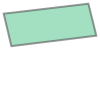

6.140205109228294

In [126]:


nom_rue = 'Rue Adolphe-FONTANEL 7'

gdf1 = gdf[['ADRESSE', 'geometry']]
gdf1 = gdf1.drop_duplicates(subset=['ADRESSE'])
gdf1 = gdf1.sort_values(by=['ADRESSE'])
gdf1 = gdf1[gdf1['ADRESSE']==nom_rue]

#display(gdf1.geometry)

#import shapely as sh

multipolygon = gdf1['geometry'].iloc[0]

points = []
for polygon in multipolygon:
    points.extend(polygon.exterior.coords[:-1])

display(gdf1['geometry'].iloc[0])
display(points[0][0])

In [137]:
# mise à jour de df1
df1 = pd.read_csv(r"C:\Users\denis.iglesias\sourcetree\Project_VI_IDC\SCANE_INDICE_MOYENNES_3_ANS.csv", sep=';', usecols= ['ANNEE', 'EGID', 'ADRESSE', 'SRE', 'INDICE'], encoding='latin1')
display(df1)
df1 = df1.drop_duplicates(subset=['ADRESSE'])
display(df1)
df1['ADRESSE'].replace('', np.nan, inplace=True)
display(df1)
df1 = df1.dropna(subset=['ADRESSE'])
display(df1)

gdf1 = gdf

# reno ou pas
def categorise(row):
    if row['INDICE'] < 450:
        return 'En dessous du seuil limite légal de 450 MJ/(m²*an)'
    else:
        return 'Audit énergétique et travaux obligatoires'
gdf1['renovation'] = gdf1.apply(lambda row: categorise(row), axis=1)

# lat/lon
gdf1_temp = gdf1[['ADRESSE', 'geometry']]

def lat_lon(row):
    gdf1_temp1 = gdf1_temp[gdf1['ADRESSE']==row['ADRESSE']]
    multipolygon = gdf1_temp1['geometry'].iloc[0]
    points = []
    for polygon in multipolygon:
        print(polygon)
        if polygon != '':
            points.extend(polygon.exterior.coords[:-1])
            coordonnees_rue_lon = points[0][0]
            coordonnees_rue_lat = points[0][1]
return [coordonnees_rue_lon, coordonnees_rue_lon]
    
gdf1.apply(lambda row: lat_lon(row), axis=1)


display(gdf1)
'''
df_rue = df1[df1['ADRESSE']==nom_rue]
# avoir les coordonnées lat/lon pour le plan zoom. Sûrement on peut simplifier
gdf1 = gdf[['ADRESSE', 'geometry']]
gdf1 = gdf1.drop_duplicates(subset=['ADRESSE'])
gdf1 = gdf1.sort_values(by=['ADRESSE'])
gdf1 = gdf1[gdf1['ADRESSE']==nom_rue]
multipolygon = gdf1['geometry'].iloc[0]

points = []
for polygon in multipolygon:
    points.extend(polygon.exterior.coords[:-1])
coordonnees_rue_lon = points[0][0]
coordonnees_rue_lat = points[0][1]
'''

,EGID,ADRESSE,ANNEE,SRE,INDICE
0,1011407.0,Rue du Prieuré 25,2014,1290.10,487.0
1,1011743.0,Rue du Léman 8,2014,1074.70,590.0
2,1022643.0,Chemin de Foulon 15,2014,195.70,383.0
3,295112850.0,Rue de La-Tambourine 12,2014,1994.00,352.0
4,2034774.0,Chemin du Centurion 5,2014,1468.00,553.0
...,...,...,...,...,...
182586,1019005.0,Chemin de Vert-Pré 3,2017,2187.00,482.0
182587,1003156.0,Rue Adolphe-FONTANEL 7,2017,835.00,553.0
182588,1011204.0,Rue VOLTAIRE 10,2016,1943.94,405.0
182589,1026995.0,Route de Sous-Moulin 39,2015,6316.28,668.0


,EGID,ADRESSE,ANNEE,SRE,INDICE
0,1011407.0,Rue du Prieuré 25,2014,1290.1,487.0
1,1011743.0,Rue du Léman 8,2014,1074.7,590.0
2,1022643.0,Chemin de Foulon 15,2014,195.7,383.0
3,295112850.0,Rue de La-Tambourine 12,2014,1994.0,352.0
4,2034774.0,Chemin du Centurion 5,2014,1468.0,553.0
...,...,...,...,...,...
179310,1026872.0,Chemin Jules-DUFRESNE 30,2015,229.0,397.0
179421,1024666.0,Chemin des Chèvres 30,2014,208.0,370.0
181088,1007225.0,Chemin du Nantet 22,2016,173.0,1004.0
181294,1025775.0,Chemin du Bois-de-By 36,2018,184.0,451.0


,EGID,ADRESSE,ANNEE,SRE,INDICE
0,1011407.0,Rue du Prieuré 25,2014,1290.1,487.0
1,1011743.0,Rue du Léman 8,2014,1074.7,590.0
2,1022643.0,Chemin de Foulon 15,2014,195.7,383.0
3,295112850.0,Rue de La-Tambourine 12,2014,1994.0,352.0
4,2034774.0,Chemin du Centurion 5,2014,1468.0,553.0
...,...,...,...,...,...
179310,1026872.0,Chemin Jules-DUFRESNE 30,2015,229.0,397.0
179421,1024666.0,Chemin des Chèvres 30,2014,208.0,370.0
181088,1007225.0,Chemin du Nantet 22,2016,173.0,1004.0
181294,1025775.0,Chemin du Bois-de-By 36,2018,184.0,451.0


,EGID,ADRESSE,ANNEE,SRE,INDICE
0,1011407.0,Rue du Prieuré 25,2014,1290.1,487.0
1,1011743.0,Rue du Léman 8,2014,1074.7,590.0
2,1022643.0,Chemin de Foulon 15,2014,195.7,383.0
3,295112850.0,Rue de La-Tambourine 12,2014,1994.0,352.0
4,2034774.0,Chemin du Centurion 5,2014,1468.0,553.0
...,...,...,...,...,...
179310,1026872.0,Chemin Jules-DUFRESNE 30,2015,229.0,397.0
179421,1024666.0,Chemin des Chèvres 30,2014,208.0,370.0
181088,1007225.0,Chemin du Nantet 22,2016,173.0,1004.0
181294,1025775.0,Chemin du Bois-de-By 36,2018,184.0,451.0


C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.147169848601882 46.213867008587975, 6.146982123830077 46.213941528216495, 6.146980651409397 46.21394208086162, 6.146987916511919 46.21395447797876, 6.147042316950247 46.21404731183699, 6.147247208497126 46.2139662562393, 6.14725069499501 46.21396438971158, 6.147169848601882 46.213867008587975))
POLYGON ((6.151604096385443 46.21183373415799, 6.151594890818014 46.21183380819566, 6.151583851361893 46.211823428605264, 6.151603656049994 46.21181915609039, 6.151600943375376 46.21173987578263, 6.151444825071087 46.211742054483, 6.151426038960715 46.21176981758489, 6.15158188006333 46.211909132296974, 6.151606643958626 46.21190887494641, 6.151604096385443 46.21183373415799))
POLYGON ((6.082266227193713 46.15713448378028, 6.082212381544678 46.157171239703224, 6.082316617787426 46.157245025324464, 6.082369858617238 46.157207966075916, 6.082358327511334 46.15719978768728, 6.082314022808545 46.157168397870585, 6.082266227193713 46.15713448378028))
POLYGON ((6.140969307135872 46.1751627

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.215527833057113 46.24796047478525, 6.215348070990763 46.24804405280321, 6.215255471770287 46.2480871046337, 6.215250040101886 46.248081720627376, 6.215212281723452 46.24810002287168, 6.215217710756543 46.24810540865073, 6.215067674944729 46.24818405694057, 6.214955740949718 46.248242732321636, 6.21493799034554 46.24822643582957, 6.214935968124273 46.24822743773922, 6.214837927313146 46.248275999225775, 6.214864451150021 46.248301837370946, 6.214890377505426 46.248289019153006, 6.214931847476423 46.24832940591398, 6.214908568929992 46.24834091052885, 6.215136091306325 46.248562895983405, 6.215198461713408 46.24853211030214, 6.215211251425278 46.24854458247663, 6.21524883806201 46.24852603095854, 6.215357127338159 46.24847258337219, 6.215403002466963 46.24851731630977, 6.215370228725576 46.24853348820945, 6.21538362524115 46.248546542727645, 6.215410689828656 46.24857291740501, 6.215417556205638 46.248579609773444, 6.215417612056683 46.24857966345909, 6.215417709760584 46.248

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.013326866974085 46.187482957890886, 6.013430624067385 46.18754778747317, 6.013525007488615 46.18747088352183, 6.01354274573733 46.187456531460946, 6.013423505395103 46.187373971026, 6.013420844953792 46.18737212899592, 6.013354454766494 46.18741888737325, 6.01335190830524 46.18741714485001, 6.013333262213259 46.187430299593814, 6.013287632847431 46.187462490378174, 6.013323956738902 46.18748526125767, 6.013326866974085 46.187482957890886))
POLYGON ((6.134040974654153 46.20292609421794, 6.134041038275817 46.202925926712595, 6.134092537650444 46.202791288800164, 6.13322383355806 46.20263124424786, 6.133172267655544 46.20276614102555, 6.133799739002516 46.20288164184067, 6.133796969132288 46.202889078088866, 6.133922748596047 46.2029122187377, 6.133925514975795 46.20290487331439, 6.134040974654153 46.20292609421794))
POLYGON ((6.092486013709988 46.182921768973536, 6.092412731621557 46.18306429796053, 6.092583925692763 46.18310593854688, 6.092594885161128 46.183108604680285, 6.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.197548822126993 46.192600952410615, 6.197550805409289 46.19260618063616, 6.197553340981485 46.192612867009586, 6.197555512473182 46.19261859032628, 6.197556405734065 46.192620945600424, 6.197558426889845 46.19262627410615, 6.197569716700261 46.192656041628425, 6.197573919827729 46.19265527726978, 6.197587577781267 46.192652790604726, 6.197601309507877 46.19268914900004, 6.197604834084966 46.192698480494194, 6.197777636884436 46.192667010078424, 6.197777045584864 46.192665444441566, 6.197794369440008 46.192662289138184, 6.197738764552401 46.192515211683094, 6.197721486276283 46.19251835848215, 6.197722109276909 46.192520010836596, 6.197549303005873 46.19255148202376, 6.197551603967326 46.192557662899006, 6.197566532545643 46.19259777440549, 6.197548822126993 46.192600952410615))
POLYGON ((6.138383947130852 46.19645283308693, 6.138386357321004 46.19645493013992, 6.13839967068037 46.19645634225079, 6.138416871156641 46.196446735754094, 6.138408109078431 46.196439257355834, 6.1

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.146134406027581 46.196751849542736, 6.145920653761873 46.196766164022755, 6.14593802627344 46.196891342451686, 6.146151931141453 46.19687689652844, 6.146134406027581 46.196751849542736))
POLYGON ((6.094155835836744 46.21859151909795, 6.094161331649566 46.21858951707605, 6.094162338361093 46.218590790439194, 6.094254531036347 46.218557997271894, 6.094102533763474 46.21835286393729, 6.094084329929922 46.21835935787041, 6.093919328868847 46.218418216593065, 6.094070327833975 46.218621244700856, 6.094155835836744 46.21859151909795))
POLYGON ((6.160706818757467 46.192831386832864, 6.160707748496177 46.19283096372083, 6.160725165864466 46.19282315480202, 6.160865569774807 46.1927594592617, 6.160762745684303 46.192650303238416, 6.160545895635761 46.19274860502948, 6.160648690778951 46.19285782480292, 6.160706818757467 46.192831386832864))
POLYGON ((6.094959418136351 46.18351909743854, 6.095122044425957 46.18356184484391, 6.09525266360571 46.18332178863093, 6.095090704523384 46.183

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.145799651927444 46.183913457543426, 6.145834897967317 46.184032624041585, 6.14601598335676 46.18400654594161, 6.146010479090899 46.18398808796606, 6.145972399333109 46.183860386157335, 6.145791671638657 46.18388647547958, 6.145799651927444 46.183913457543426))
POLYGON ((6.139864438111932 46.184768631913165, 6.139865214208531 46.18476873171847, 6.139866653048974 46.1847627186139, 6.139866264564003 46.18476271414019, 6.139863052488358 46.184761508462834, 6.139863058929303 46.18476123863219, 6.13985426951664 46.18476023953177, 6.139854129329628 46.1847606859594, 6.13982583035398 46.18475739381553, 6.139825970605624 46.18475694468957, 6.139822743071178 46.18475654944722, 6.139822883322847 46.18475610032135, 6.139814871367494 46.184755198339985, 6.139814429184526 46.184757443354336, 6.139754068606675 46.18475090387527, 6.139754641517525 46.18474866306572, 6.139746889406518 46.184747674103846, 6.139746900163853 46.18474722348665, 6.139732946009091 46.18474553421771, 6.13973280792

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.165220518042225 46.29099376825772, 6.165221310387428 46.29095737786593, 6.165261752411329 46.290957805703, 6.165260947308162 46.29099418785388, 6.165485702036557 46.290996554732146, 6.165487426505425 46.29089986108695, 6.16499736194568 46.290894798453394, 6.164995637417229 46.29099140213224, 6.165220518042225 46.29099376825772))
POLYGON ((6.128348296019294 46.21109605732559, 6.128375653055236 46.211095741616354, 6.128378564364281 46.211104052535035, 6.128484491554181 46.21110486054289, 6.128484372710247 46.210997364659235, 6.12833214972899 46.21099704380101, 6.128269030602642 46.21099691091698, 6.128268657131199 46.21110395304502, 6.128345252913046 46.211104028296134, 6.128348296019294 46.21109605732559))
POLYGON ((6.143232441314186 46.178332491492895, 6.143280461378515 46.17832303684108, 6.143279723928514 46.178321317175346, 6.143324228730746 46.178312632739015, 6.143283145955955 46.178211077989424, 6.143230569113771 46.178221425861764, 6.143214427119708 46.17818162474436,

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.118982248268064 46.17969385267241, 6.119007583081542 46.17973606193257, 6.119056956953772 46.17981831862069, 6.119202617901286 46.17977608674166, 6.119153244858705 46.17969384182521, 6.119127884731654 46.17965160441248, 6.119091768187565 46.17966207972461, 6.119085510550656 46.179672678586115, 6.119031817590643 46.17968825456821, 6.119016567478395 46.17968389707482, 6.119013489162786 46.17968479042985, 6.118982248268064 46.17969385267241))
POLYGON ((6.144303869076585 46.19715803031972, 6.144206910199671 46.197049576673095, 6.143902162900504 46.1971808509444, 6.144001129876531 46.19728972826233, 6.144303869076585 46.19715803031972))
POLYGON ((6.104740878459475 46.22614876099163, 6.104618340545127 46.2262328653437, 6.104699011400894 46.22628942689023, 6.104737001522031 46.22631613695379, 6.104859539484551 46.22623203067386, 6.104740878459475 46.22614876099163))
POLYGON ((6.080344473327451 46.23427084337962, 6.080205778820766 46.23417641308604, 6.080158721738149 46.23420985085

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.120862772908263 46.22688874623442, 6.120732020511365 46.22679011986385, 6.120730113982956 46.22679133557395, 6.12057568269289 46.226889631624175, 6.120706598485277 46.22698836084967, 6.120765344534834 46.226950889193525, 6.120860865083399 46.226889961931676, 6.120862772908263 46.22688874623442))
POLYGON ((6.202702839350074 46.233232787226356, 6.20267949841571 46.23325547152561, 6.202663873077677 46.233247116112494, 6.20264611542208 46.233263834628815, 6.202587265107018 46.233325449403246, 6.202674085143211 46.23336446432418, 6.202791188190204 46.23341708720261, 6.202886348158994 46.23331565534225, 6.202708839906158 46.23323549706585, 6.202702839350074 46.233232787226356))
POLYGON ((6.119832948640185 46.227954310362, 6.119651561035883 46.2278174598427, 6.119508534210946 46.22790874513437, 6.119505670365112 46.22791057132161, 6.119687060483191 46.22804742300534, 6.119689923055961 46.228045595898976, 6.119832948640185 46.227954310362))
POLYGON ((6.084127320964324 46.2307367381

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.096105888141865 46.15727954982482, 6.096247136026293 46.15737216628752, 6.096385216537493 46.15727044334198, 6.096335649655622 46.1572379159449, 6.096312625073121 46.15722280589144, 6.096288619095926 46.15724051292907, 6.096219946098588 46.1571955248811, 6.096105888141865 46.15727954982482))
POLYGON ((6.267023046660677 46.217009587039335, 6.267028062349589 46.21697518120205, 6.267005811645361 46.216973330786885, 6.267014921827711 46.21691719746745, 6.266988742897172 46.21691546550234, 6.266992687198955 46.2168904230094, 6.266882941020122 46.21688316216055, 6.266881192368965 46.21689532451232, 6.26686572172188 46.217002909060646, 6.267023046660677 46.217009587039335))
POLYGON ((6.16669461402707 46.29213633564857, 6.166621388527663 46.292135686868825, 6.166618784266737 46.292135663852505, 6.166617127007139 46.29222381037855, 6.16661452931387 46.29222378383734, 6.166614192282815 46.29224182855266, 6.166614021565481 46.29225094490225, 6.166616616601809 46.29225097411258, 6.1666

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.226427708688553 46.22610371197247, 6.226337033861299 46.22616043378691, 6.226328587533309 46.22616571678234, 6.226377777747265 46.22620376221574, 6.226385663807549 46.22619889874202, 6.22640077077912 46.22621063073897, 6.226415736312394 46.22622225325454, 6.226422835518508 46.22621773939508, 6.226415697183323 46.22621226471475, 6.226460396819058 46.22618422531389, 6.226461393181888 46.22616849091695, 6.226457265918003 46.22616534903091, 6.226449284134144 46.226159274211646, 6.226477158107257 46.22614176014627, 6.226429113496082 46.22610471579638, 6.226427708688553 46.22610371197247))
POLYGON ((6.134745389395285 46.20912507436278, 6.134744478647431 46.20912533374377, 6.134741738609151 46.20912611269621, 6.134701270307489 46.20913850423681, 6.134573087788819 46.209177678713786, 6.13438433878805 46.20923540083196, 6.134435331035317 46.20931682603515, 6.13444879837083 46.20933831592677, 6.134805844229579 46.20922943644538, 6.134808281486298 46.20922869267903, 6.134808840068614 

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.138507680301677 46.2092431242471, 6.138289404228675 46.20919105703612, 6.138239028366804 46.209291518203415, 6.138225375342655 46.20931870495514, 6.138178377426701 46.209415164547636, 6.138176896961807 46.20941524195148, 6.13817613498528 46.20941675903384, 6.138223241771491 46.209414058588536, 6.138431173049361 46.209401046817106, 6.138510125885174 46.20924387307338, 6.138507680301677 46.2092431242471))
POLYGON ((6.119584705265234 46.187619289614005, 6.11950222454623 46.187654605758695, 6.119717981017581 46.18789520856731, 6.119800673733542 46.18785991993199, 6.119584705265234 46.187619289614005))
POLYGON ((6.25441534596108 46.209409939719684, 6.254410719492461 46.20940697535339, 6.254265278764228 46.20950626674051, 6.25427062383059 46.209509854025406, 6.254307782647002 46.20953479048289, 6.254322040014825 46.20954435870958, 6.25435483862617 46.20956648292008, 6.254339105090409 46.209577689511704, 6.254373184253413 46.20960045872121, 6.254388811143478 46.20958932927614, 6.2

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.130505681096965 46.21433600794178, 6.130394855538035 46.21415514405071, 6.1302070670747 46.21421081840726, 6.130317912915539 46.21439087210714, 6.130505681096965 46.21433600794178))
POLYGON ((6.149695610563211 46.202165922967275, 6.149665942135771 46.202155058627135, 6.14946725558244 46.20221792717537, 6.149529254617621 46.20231310130093, 6.149574420165256 46.20229886079098, 6.149668146438872 46.202269430657665, 6.149712546525161 46.20226561765553, 6.149695610563211 46.202165922967275))
POLYGON ((6.102678771977759 46.205498007201456, 6.102602378045241 46.20541094370902, 6.102533747878956 46.20533272789419, 6.102464293543187 46.205362072933134, 6.102449356912191 46.20534503043512, 6.102427033004885 46.20535446202645, 6.102431222808329 46.205359243121165, 6.102380010928912 46.20538088057273, 6.102455560716472 46.2054671074073, 6.102382026163358 46.20549811978848, 6.102412941897931 46.205533393941934, 6.102406055739699 46.20553630386136, 6.102419641201987 46.20555180358726, 6.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.108962272945793 46.19276433774201, 6.108830338765546 46.192954814810776, 6.109022277134192 46.19301796386374, 6.109153815284764 46.19282787327332, 6.108962272945793 46.19276433774201))
POLYGON ((6.15825555450957 46.20336521271106, 6.158254176446291 46.20337410390483, 6.158280044469478 46.203386992996386, 6.158291025818499 46.20338297819104, 6.158291806818201 46.203382717150205, 6.158378113883102 46.203425978841864, 6.158377967385114 46.20342669782317, 6.158376996687223 46.2034349629652, 6.15840222424161 46.203447484888216, 6.1584125417581 46.20344409321384, 6.158413455668195 46.20344374551172, 6.158499006663389 46.20348665755065, 6.15849899394069 46.20348719811401, 6.158498270332397 46.20349619660077, 6.15850252715286 46.203498331259574, 6.158522385905862 46.203508290226885, 6.158522825190194 46.20350850933502, 6.158524810156977 46.20350950531122, 6.158535153858497 46.20350522144004, 6.158535805339891 46.20350495802831, 6.158538382143901 46.20350607767782, 6.158615697749969

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.14473210853343 46.18921322123286, 6.144682937247794 46.18908517489789, 6.144548449076121 46.18910854954759, 6.144519315799504 46.189113704249095, 6.144567727672258 46.18924093133331, 6.144568210971699 46.18924228820072, 6.14473210853343 46.18921322123286))
POLYGON ((6.089901385666214 46.18343908093796, 6.089908206851988 46.18344126779116, 6.089909570694241 46.18343923370175, 6.089911695788449 46.18343606520664, 6.089923245343988 46.18341884195732, 6.089924607845557 46.18341680965107, 6.089917652883956 46.18341458521136, 6.089971194892695 46.18333395086705, 6.089856141547665 46.183297093807546, 6.089800264977931 46.18327919374399, 6.089793866970086 46.18328883210535, 6.089694210184446 46.18343894598411, 6.089783194438303 46.18346745447508, 6.089767431931495 46.18349118158437, 6.089849349282185 46.183517439941944, 6.089901385666214 46.18343908093796))
POLYGON ((6.078997004861208 46.17872961792813, 6.078996502530647 46.17873256466901, 6.079008030490693 46.17873351517911, 6.079

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

POLYGON ((6.181655084295332 46.165909238377935, 6.181578921087948 46.16586339379447, 6.181478906232637 46.1659437134662, 6.181631811569209 46.16603562958991, 6.181641440202116 46.166027998849, 6.181731939868912 46.16595549728012, 6.181655084295332 46.165909238377935))
POLYGON ((6.148356387166471 46.196141112392105, 6.148284693349752 46.196089906556196, 6.148127040897976 46.196197026669644, 6.148254275904968 46.196287291559614, 6.148374397192259 46.19620544680118, 6.148319639441401 46.196166130562474, 6.148356387166471 46.196141112392105))
POLYGON ((6.192393648419862 46.196803600406355, 6.192529962754516 46.196751848331985, 6.192508556226278 46.196724802492426, 6.192504112466965 46.19672655274979, 6.192469484233187 46.19668289682013, 6.192484776642043 46.19667703974427, 6.192467275476887 46.19665489437577, 6.192451985132935 46.196660661504666, 6.192417487740882 46.19661700970273, 6.192422061018648 46.19661526087973, 6.192400402281038 46.19658803139796, 6.192263839509022 46.1966393298308

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\denis.iglesias\AppData\Local\Temp\ipykernel_24584\2270491964.py:28: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be remo

IndexError: single positional indexer is out-of-bounds